# CommonRoad Vehicle Models

In [10]:
#!pip install commonroad-vehicle-models

In [11]:
"""
Functions for testing different vehicle models (see examples in chap. 11 of documentation)
"""

from scipy.integrate import odeint
import numpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import title, legend
import math

from vehiclemodels.parameters_vehicle2 import parameters_vehicle2
from vehiclemodels.init_ks import init_ks
from vehiclemodels.init_st import init_st
from vehiclemodels.init_mb import init_mb
from vehiclemodels.init_std import init_std
from vehiclemodels.vehicle_dynamics_ks import vehicle_dynamics_ks
from vehiclemodels.vehicle_dynamics_st import vehicle_dynamics_st
from vehiclemodels.vehicle_dynamics_mb import vehicle_dynamics_mb
from vehiclemodels.vehicle_dynamics_std import vehicle_dynamics_std

In [12]:
def func_KS(x, t, u, p):
    f = vehicle_dynamics_ks(x, u, p)
    return f

def func_ST(x, t, u, p):
    f = vehicle_dynamics_st(x, u, p)
    return f

def func_MB(x, t, u, p):
    f = vehicle_dynamics_mb(x, u, p)
    return f

def func_STD(x, t, u, p):
    f = vehicle_dynamics_std(x, u, p)
    return f

In [13]:
# load parameters
p = parameters_vehicle2()
g = 9.81  # [m/s^2]

# set options --------------------------------------------------------------
tStart = 0  # start time
tFinal = 1  # start time

delta0 = 0
vel0 = 15
Psi0 = 0
dotPsi0 = 0
beta0 = 0
sy0 = 0
initialState = [0, sy0, delta0, vel0, Psi0, dotPsi0, beta0]  # initial state for simulation
x0_KS = init_ks(initialState)  # initial state for kinematic single-track model
x0_ST = init_st(initialState)  # initial state for single-track model
x0_MB = init_mb(initialState, p)  # initial state for multi-body model
x0_STD = init_std(initialState, p)  # initial state for single-track drift model
# --------------------------------------------------------------------------

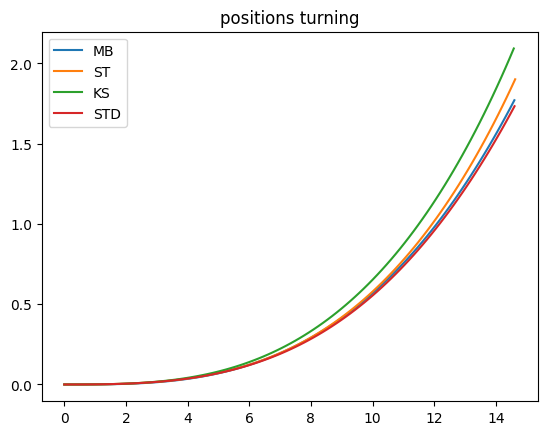

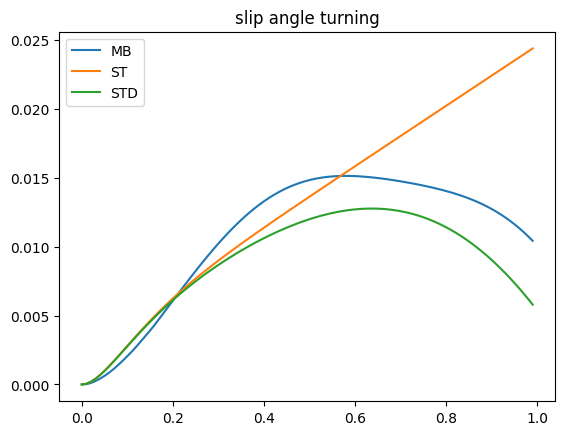

In [14]:
def cornering_left(v_delta, a_long):
    # steering to left
    t = numpy.arange(0, tFinal, 0.01)
    u = [v_delta, a_long]

    # simulate multibody
    x_left = odeint(func_MB, x0_MB, t, args=(u, p))

    # simulate single-track model
    x_left_st = odeint(func_ST, x0_ST, t, args=(u, p))

    # simulate kinematic single-track model
    x_left_ks = odeint(func_KS, x0_KS, t, args=(u, p))

    # simulate single-track drift model
    x_left_std = odeint(func_STD, x0_STD, t, args=(u,p))

    # results
    # position
    title('positions turning')
    plt.plot([tmp[0] for tmp in x_left], [tmp[1] for tmp in x_left])
    plt.plot([tmp[0] for tmp in x_left_st], [tmp[1] for tmp in x_left_st])
    plt.plot([tmp[0] for tmp in x_left_ks], [tmp[1] for tmp in x_left_ks])
    plt.plot([tmp[0] for tmp in x_left_std], [tmp[1] for tmp in x_left_std])
    legend(['MB', 'ST', 'KS', 'STD'])
    plt.autoscale()
    plt.show()

    # slip angle
    title('slip angle turning')
    plt.plot(t, [tmp[10] / tmp[3] for tmp in x_left])
    plt.plot(t, [tmp[6] for tmp in x_left_st])
    plt.plot(t, [tmp[6] for tmp in x_left_std])
    legend(['MB', 'ST', 'STD'])
    plt.show()

cornering_left(0.15, 0)

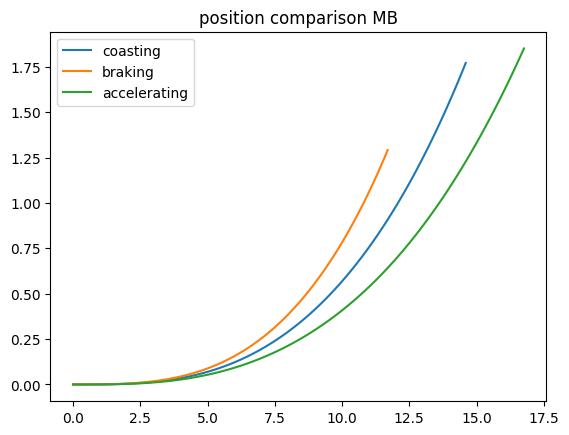

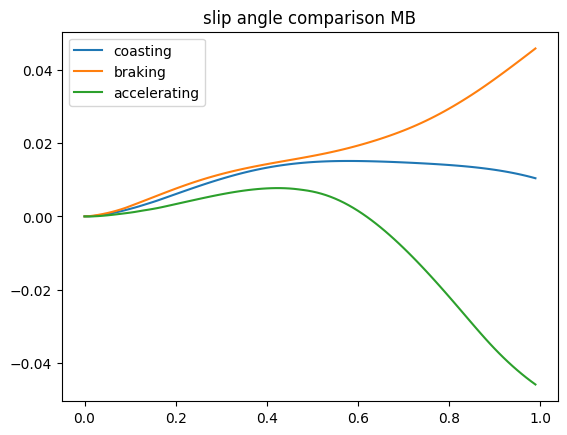

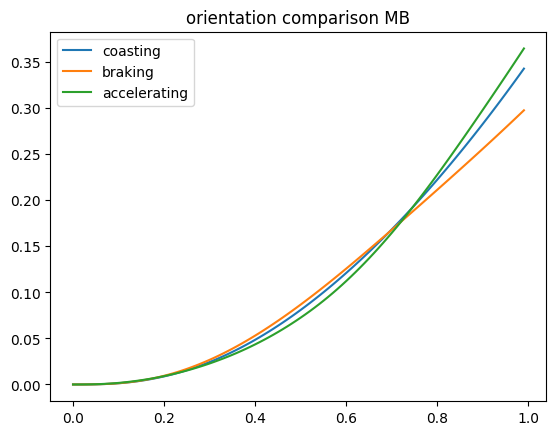

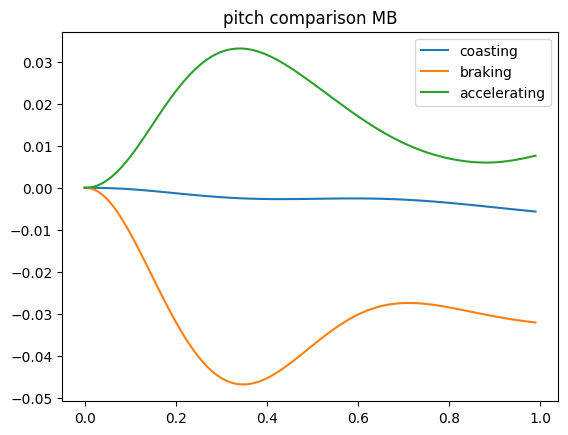

In [15]:
def oversteer_understeer_MB():
    t = numpy.arange(0, tFinal, 0.01)
    v_delta = 0.15

    # coasting
    u = [v_delta, 0]
    x_coast = odeint(func_MB, x0_MB, t, args=(u, p))

    # braking
    u = [v_delta, -0.7*g]
    x_brake = odeint(func_MB, x0_MB, t, args=(u, p))

    # accelerating
    u = [v_delta, 0.63 * g]
    x_acc = odeint(func_MB, x0_MB, t, args=(u, p))

    # position
    title('position comparison MB')
    plt.plot([tmp[0] for tmp in x_coast], [tmp[1] for tmp in x_coast])
    plt.plot([tmp[0] for tmp in x_brake], [tmp[1] for tmp in x_brake])
    plt.plot([tmp[0] for tmp in x_acc], [tmp[1] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()
    # slip angles
    title('slip angle comparison MB')
    plt.plot(t, [tmp[10] / tmp[3] for tmp in x_coast])
    plt.plot(t, [tmp[10] / tmp[3] for tmp in x_brake])
    plt.plot(t, [tmp[10] / tmp[3] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()
    # orientation
    title('orientation comparison MB')
    plt.plot(t, [tmp[4] for tmp in x_coast])
    plt.plot(t, [tmp[4] for tmp in x_brake])
    plt.plot(t, [tmp[4] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()
    # pitch
    title('pitch comparison MB')
    plt.plot(t, [tmp[8] for tmp in x_coast])
    plt.plot(t, [tmp[8] for tmp in x_brake])
    plt.plot(t, [tmp[8] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()

oversteer_understeer_MB()

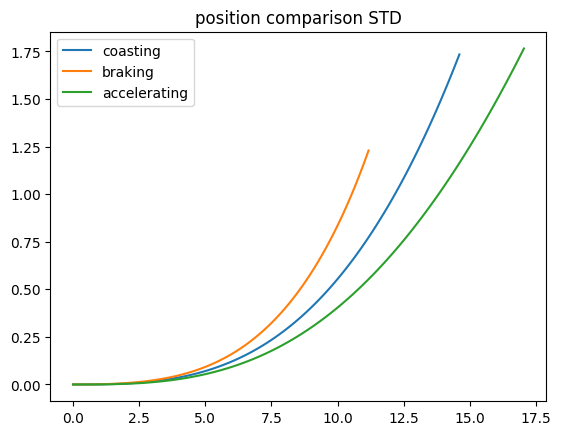

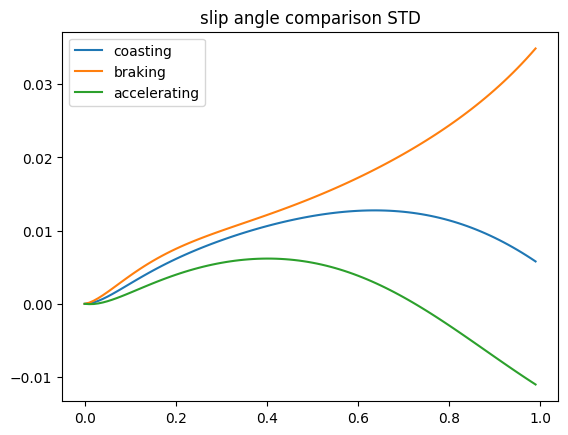

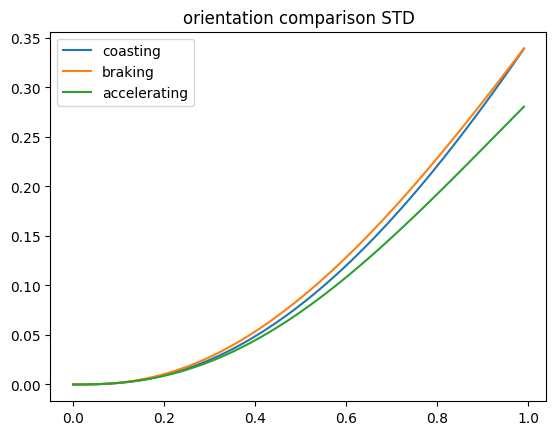

In [16]:
def oversteer_understeer_STD():
    t = numpy.arange(0, tFinal, 0.01)
    v_delta = 0.15

    # coasting
    u = [v_delta, 0]
    x_coast = odeint(func_STD, x0_STD, t, args=(u, p))

    # braking
    u = [v_delta, -0.75 * g]
    x_brake = odeint(func_STD, x0_STD, t, args=(u, p))

    # accelerating
    u = [v_delta, 0.63 * g]
    x_acc = odeint(func_STD, x0_STD, t, args=(u, p))

    # position
    title('position comparison STD')
    plt.plot([tmp[0] for tmp in x_coast], [tmp[1] for tmp in x_coast])
    plt.plot([tmp[0] for tmp in x_brake], [tmp[1] for tmp in x_brake])
    plt.plot([tmp[0] for tmp in x_acc], [tmp[1] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()
    # compare slip angles
    title('slip angle comparison STD')
    plt.plot(t, [tmp[6] for tmp in x_coast])
    plt.plot(t, [tmp[6] for tmp in x_brake])
    plt.plot(t, [tmp[6] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()
    # orientation
    title('orientation comparison STD')
    plt.plot(t, [tmp[4] for tmp in x_coast])
    plt.plot(t, [tmp[4] for tmp in x_brake])
    plt.plot(t, [tmp[4] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()

oversteer_understeer_STD()

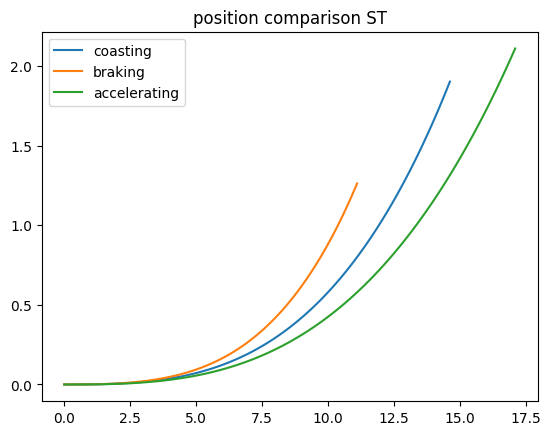

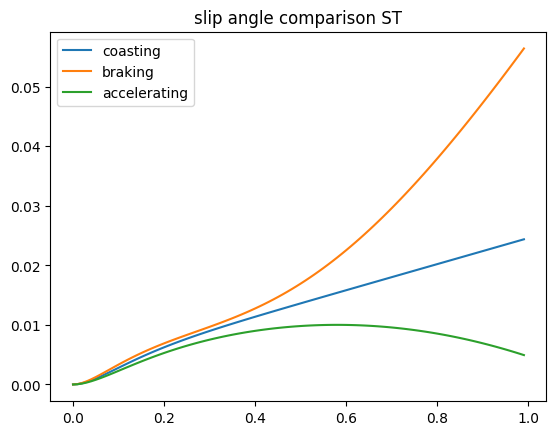

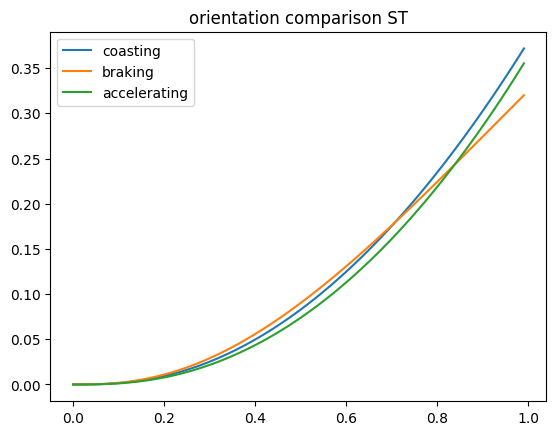

In [17]:
def oversteer_understeer_ST():
    t = numpy.arange(0, tFinal, 0.01)
    v_delta = 0.15

    # coasting
    u = [v_delta, 0]
    x_coast = odeint(func_ST, x0_ST, t, args=(u, p))

    # braking
    u = [v_delta, -0.75 * g]
    x_brake = odeint(func_ST, x0_ST, t, args=(u, p))

    # accelerating
    u = [v_delta, 0.63 * g]
    x_acc = odeint(func_ST, x0_ST, t, args=(u, p))

    # position
    title('position comparison ST')
    plt.plot([tmp[0] for tmp in x_coast], [tmp[1] for tmp in x_coast])
    plt.plot([tmp[0] for tmp in x_brake], [tmp[1] for tmp in x_brake])
    plt.plot([tmp[0] for tmp in x_acc], [tmp[1] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()
    # compare slip angles
    title('slip angle comparison ST')
    plt.plot(t, [tmp[6] for tmp in x_coast])
    plt.plot(t, [tmp[6] for tmp in x_brake])
    plt.plot(t, [tmp[6] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()
    # orientation
    title('orientation comparison ST')
    plt.plot(t, [tmp[4] for tmp in x_coast])
    plt.plot(t, [tmp[4] for tmp in x_brake])
    plt.plot(t, [tmp[4] for tmp in x_acc])
    legend(['coasting', 'braking', 'accelerating'])
    plt.show()

oversteer_understeer_ST()

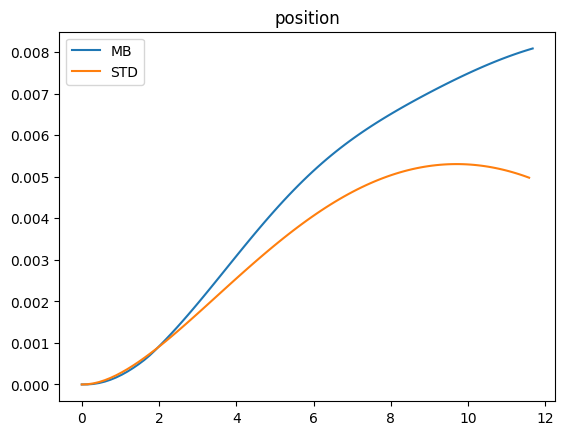

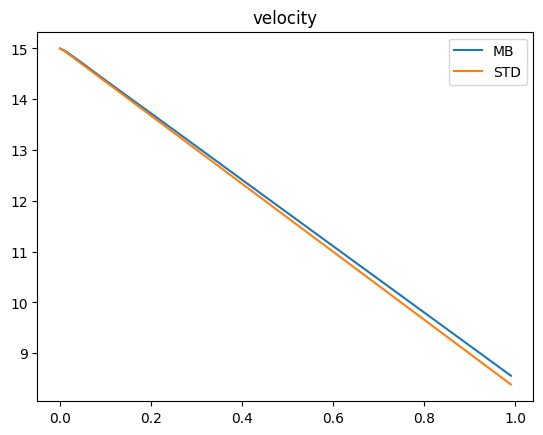

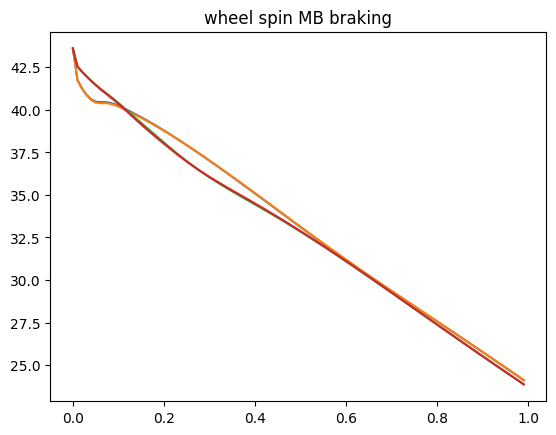

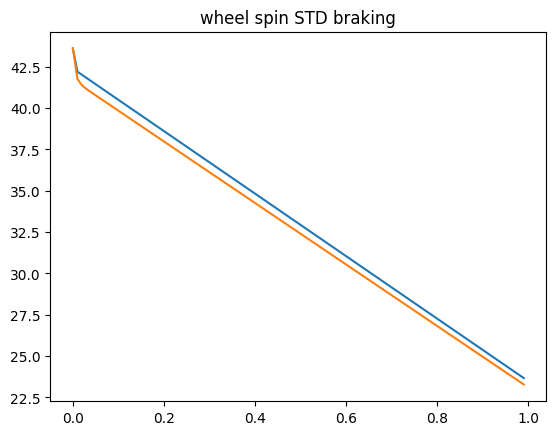

In [18]:
def braking():
    t = numpy.arange(0, tFinal, 0.01)
    v_delta = 0.0
    acc = -0.7 * g
    u = [v_delta, acc]

    # simulate car
    x_brake = odeint(func_MB, x0_MB, t, args=(u, p))
    x_brake_STD = odeint(func_STD, x0_STD, t, args=(u, p))


    # position
    plt.plot([tmp[0] for tmp in x_brake], [tmp[1] for tmp in x_brake])
    plt.plot([tmp[0] for tmp in x_brake_STD], [tmp[1] for tmp in x_brake_STD])

    plt.title('position')
    legend(['MB', 'STD'])
    plt.show()

    # velocity
    plt.plot(t, [tmp[3] for tmp in x_brake])
    plt.plot(t, [tmp[3]*math.cos(tmp[6]) for tmp in x_brake_STD])

    plt.title('velocity')
    legend(['MB', 'STD'])
    plt.show()

    # wheel spin
    title('wheel spin MB braking')
    plt.plot(t, [tmp[23] for tmp in x_brake])
    plt.plot(t, [tmp[24] for tmp in x_brake])
    plt.plot(t, [tmp[25] for tmp in x_brake])
    plt.plot(t, [tmp[26] for tmp in x_brake])
    plt.show()
    title('wheel spin STD braking')
    plt.plot(t, [tmp[7] for tmp in x_brake_STD])
    plt.plot(t, [tmp[8] for tmp in x_brake_STD])
    plt.show()

braking()

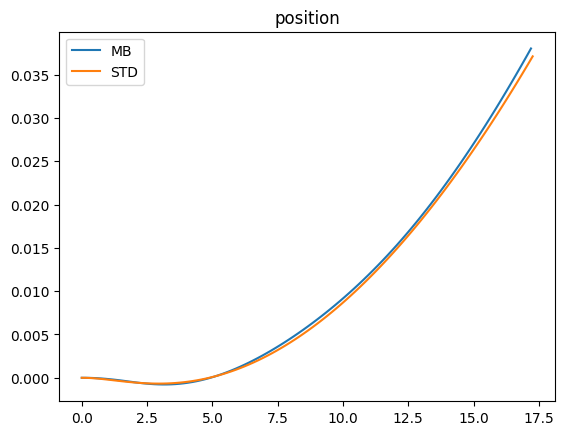

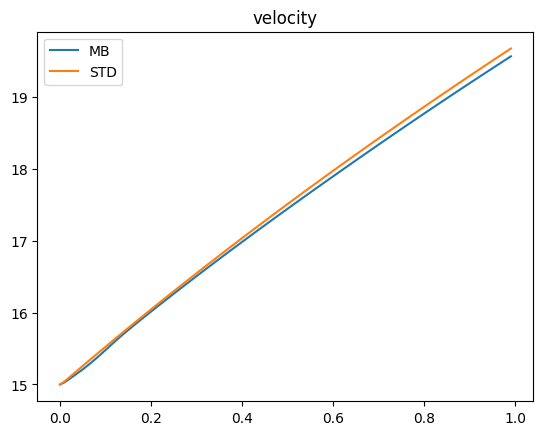

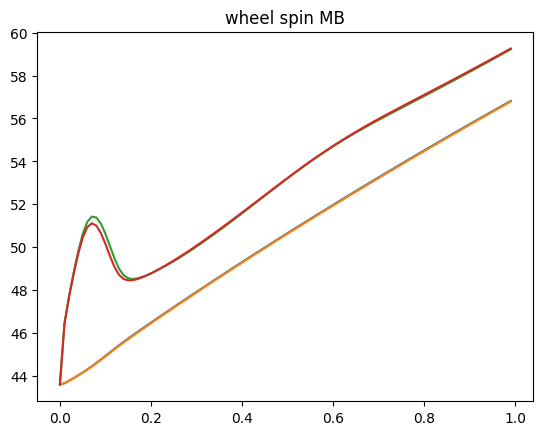

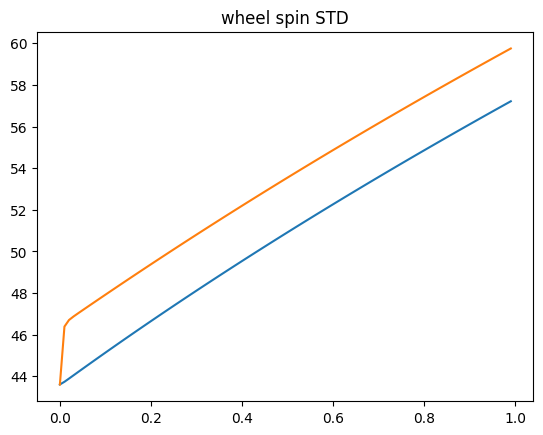

In [19]:
def accelerating():
    t = numpy.arange(0, tFinal, 0.01)
    v_delta = 0.0
    acc = 0.63 * g
    u = [v_delta, acc]

    # simulate car
    x_acc = odeint(func_MB, x0_MB, t, args=(u, p))
    x_acc_STD = odeint(func_STD, x0_STD, t, args=(u, p))

    # position
    plt.plot([tmp[0] for tmp in x_acc], [tmp[1] for tmp in x_acc])
    plt.plot([tmp[0] for tmp in x_acc_STD], [tmp[1] for tmp in x_acc_STD])
    plt.title('position')
    legend(['MB', 'STD'])
    plt.show()

    # velocity
    plt.plot(t, [tmp[3] for tmp in x_acc])
    plt.plot(t, [tmp[3] * math.cos(tmp[6]) for tmp in x_acc_STD])
    plt.title('velocity')
    legend(['MB', 'STD'])
    plt.show()

    # wheel spin
    title('wheel spin MB')
    plt.plot(t, [tmp[23] for tmp in x_acc])
    plt.plot(t, [tmp[24] for tmp in x_acc])
    plt.plot(t, [tmp[25] for tmp in x_acc])
    plt.plot(t, [tmp[26] for tmp in x_acc])
    plt.show()
    title('wheel spin STD')
    plt.plot(t, [tmp[7] for tmp in x_acc_STD])
    plt.plot(t, [tmp[8] for tmp in x_acc_STD])
    plt.show()

accelerating()